## Business Objective: Classification of US publicly listed companies based on business description Files Attached
 Company Business Description
This file has the list of all US publicly listed companies. It has the company name, stock ticker and business description.

 Training Data
This file has 2,000 US publicly listed companies which are categorized by certain tags mentioned in the column G. You will see lot of tags for one company. You need to worry about the first tag only. Ignore the rest of the tags.
Note: You need to create new variable with first tag from column G variable it will be your target variable and business description will be feature variables.

Analysis


You will have to classify the companies mentioned in the ‚Company Business Description‛ file as per the tags mentioned in the ‚Training Data‛ file. As mentioned above please consider the first tags only and ignore the rest of the tags.
Note: You need to build model using training data, classify the Companies in ‘Company Business description file.
Key expectations (these steps need to be included as part of the processing):


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package wordnet to C:\Users\kalluri
[nltk_data]     bro's\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\kalluri
[nltk_data]     bro's\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
US = pd.read_excel('Training Data.xlsx')

In [207]:
US.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Industry Classifications,Security Tickers,NaN
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG,NaN
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC,NaN
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC,NaN
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH,NaN


In [208]:
pd.array(US.loc[0,:])

<PandasArray>
[            'Company Name',          'Exchange:Ticker',
             'Company Type',           'Company Status',
     'Geographic Locations',     'Business Description',
 'Industry Classifications',         'Security Tickers',
                        nan]
Length: 9, dtype: object

In [209]:
US1 = US.loc[1:2003,]

In [210]:
US1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG,NaN
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC,NaN
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC,NaN
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH,NaN
5,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH,NaN


In [211]:
US1.columns= ['Company_Name','Exchange_Ticker','Company_Type','Company_Status','Geographic_Locations','Business_Description','Industry_Classifications','Security_Tickers','nan']

In [212]:
US1.columns

Index(['Company_Name', 'Exchange_Ticker', 'Company_Type', 'Company_Status',
       'Geographic_Locations', 'Business_Description',
       'Industry_Classifications', 'Security_Tickers', 'nan'],
      dtype='object')

In [213]:
US1.shape

(2002, 9)

In [214]:
US1.dtypes

Company_Name                object
Exchange_Ticker             object
Company_Type                object
Company_Status              object
Geographic_Locations        object
Business_Description        object
Industry_Classifications    object
Security_Tickers            object
nan                         object
dtype: object

In [215]:
US1 = US1.drop(columns=['nan'])

In [216]:
US1.shape

(2002, 8)

In [217]:
new =US1["Industry_Classifications"].str.split("(",n=1 , expand = True)

In [222]:
new["first_tag"]= new[0]

In [223]:
new

,0,1,first_tag
1,Beauty Care Products,Primary); Consumer Staples (Primary); Hair Car...,Beauty Care Products
2,"Catalog Flowers, Gifts and Novelties","Primary); Catalog Hobbies, Games and Toy Retai...","Catalog Flowers, Gifts and Novelties"
3,Information Technology,Primary); Internet Software and Services (Prim...,Information Technology
4,Casualty,Primary); Financials (Primary); Fire and Marin...,Casualty
5,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services
...,...,...,...
1998,Banks,Primary); Banks (Primary); Financials (Primary...,Banks
1999,Catalog Apparel and Accessory Retail,Primary); Catalog Specialty Retail (Primary); ...,Catalog Apparel and Accessory Retail
2000,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services
2001,Banks,Primary); Banks (Primary); Financials (Primary...,Banks


In [224]:
new.dtypes

0            object
1            object
first_tag    object
dtype: object

In [225]:
US1 = pd.concat((US1 ,new), axis=1)

In [226]:
US1.head()

,Company_Name,Exchange_Ticker,Company_Type,Company_Status,Geographic_Locations,Business_Description,Industry_Classifications,Security_Tickers,0,1,0,1,first_tag
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG,Beauty Care Products,Primary); Consumer Staples (Primary); Hair Car...,Beauty Care Products,Primary); Consumer Staples (Primary); Hair Car...,Beauty Care Products
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC,"Catalog Flowers, Gifts and Novelties","Primary); Catalog Hobbies, Games and Toy Retai...","Catalog Flowers, Gifts and Novelties","Primary); Catalog Hobbies, Games and Toy Retai...","Catalog Flowers, Gifts and Novelties"
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC,Information Technology,Primary); Internet Software and Services (Prim...,Information Technology,Primary); Internet Software and Services (Prim...,Information Technology
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH,Casualty,Primary); Financials (Primary); Fire and Marin...,Casualty,Primary); Financials (Primary); Fire and Marin...,Casualty
5,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services


In [230]:
#checking duplicate values 
US1.duplicated().value_counts()# no duplicateds

False    2002
dtype: int64

In [231]:
#Checking for missing values
US1.isnull().any().value_counts()

False    11
True      2
dtype: int64

In [232]:
US1.Business_Description.isnull().value_counts()

False    2002
Name: Business_Description, dtype: int64

In [233]:
US1.first_tag.isnull().value_counts()

False    2002
Name: first_tag, dtype: int64

### Splitting the data into existing and New

In [234]:
US1_existing = US1[US1.first_tag.isnull()==0]

In [235]:
US1_New = US1[US1.first_tag.isnull()==1]

In [236]:
US1_existing.head()

,Company_Name,Exchange_Ticker,Company_Type,Company_Status,Geographic_Locations,Business_Description,Industry_Classifications,Security_Tickers,0,1,0,1,first_tag
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG,Beauty Care Products,Primary); Consumer Staples (Primary); Hair Car...,Beauty Care Products,Primary); Consumer Staples (Primary); Hair Car...,Beauty Care Products
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC,"Catalog Flowers, Gifts and Novelties","Primary); Catalog Hobbies, Games and Toy Retai...","Catalog Flowers, Gifts and Novelties","Primary); Catalog Hobbies, Games and Toy Retai...","Catalog Flowers, Gifts and Novelties"
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC,Information Technology,Primary); Internet Software and Services (Prim...,Information Technology,Primary); Internet Software and Services (Prim...,Information Technology
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH,Casualty,Primary); Financials (Primary); Fire and Marin...,Casualty,Primary); Financials (Primary); Fire and Marin...,Casualty
5,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services,Primary); Commercial Services and Supplies (Pr...,Commercial and Professional Services


In [253]:
US1_existing.columns

Index([            'Company_Name',          'Exchange_Ticker',
                   'Company_Type',           'Company_Status',
           'Geographic_Locations',     'Business_Description',
       'Industry_Classifications',         'Security_Tickers',
                                0,                          1,
                                0,                          1,
                      'first_tag',                   'Target'],
      dtype='object')

In [254]:
US1_existing.Business_Description.isnull().value_counts()

False    2002
Name: Business_Description, dtype: int64

In [255]:
US1_existing.first_tag.isnull().value_counts()

False    2002
Name: first_tag, dtype: int64

In [256]:
US1_existing.first_tag.value_counts().head(15)

Banks                                    241
Healthcare                               153
Biotechnology                            145
Energy                                   133
Consumer Discretionary                   117
Information Technology                   106
Capital Goods                             88
Commercial and Professional Services      85
Application Software                      50
Communications Equipment                  37
Asset Management and Custody Banks        32
Consumer Staples                          31
Chemicals                                 28
Application Hosting Services              27
Aerospace and Defense                     23
Name: first_tag, dtype: int64

In [257]:
from numpy import where as IF

In [264]:
US1_existing['Target'] =IF(US1_existing.first_tag=='Banks ','Banks',
                           IF(US1_existing.first_tag=='Healthcare ','Healthcare',
                              IF(US1_existing.first_tag=='Biotechnology ','Biotechnology',
                                 IF(US1_existing.first_tag=='Energy ','Energy',
                                    IF(US1_existing.first_tag=='Consumer Discretionary ','Consumer_Discretionary',
                                       IF(US1_existing.first_tag=='Information Technology ','Information_Technology',
                                          IF(US1_existing.first_tag=='Capital Goods ','Capital Goods',
                                             IF(US1_existing.first_tag=='Commercial and Professional Services ','Commercial_and_Professional _ervices',
                                                IF(US1_existing.first_tag=='Application Software ','Application_Software',
                                                   IF(US1_existing.first_tag=='Communications Equipment ','Communications_Equipment',
                                                      IF(US1_existing.first_tag=='Asset Management and Custody Banks ','Asset_Management_and_Custody_Banks',
                                                         IF(US1_existing.first_tag=='Consumer Staples','Consumer_Staples ','others'))))))))))))


In [265]:
US1_existing.columns

Index([            'Company_Name',          'Exchange_Ticker',
                   'Company_Type',           'Company_Status',
           'Geographic_Locations',     'Business_Description',
       'Industry_Classifications',         'Security_Tickers',
                                0,                          1,
                                0,                          1,
                      'first_tag',                   'Target'],
      dtype='object')

In [266]:
US1_existing.Target.value_counts()

others                                  815
Banks                                   241
Healthcare                              153
Biotechnology                           145
Energy                                  133
Consumer_Discretionary                  117
Information_Technology                  106
Capital Goods                            88
Commercial_and_Professional _ervices     85
Application_Software                     50
Communications_Equipment                 37
Asset_Management_and_Custody_Banks       32
Name: Target, dtype: int64

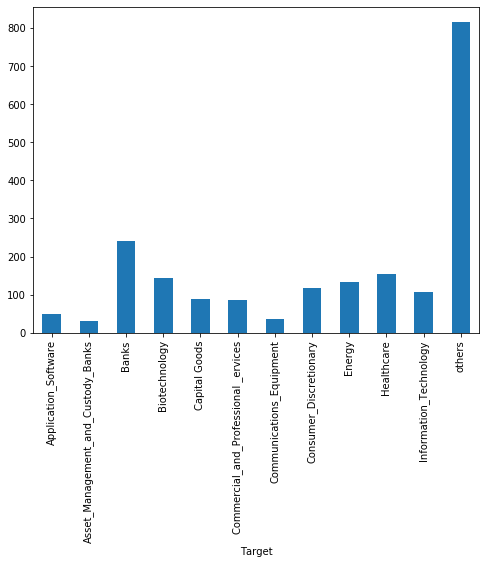

In [267]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
US1_existing.groupby('Target').Business_Description.count().plot.bar(ylim=0)
plt.show()

In [268]:
final_data = US1_existing[['Business_Description','Target']]

In [269]:
final_data

,Business_Description,Target
1,"024 Pharma, Inc. provides healthcare products ...",others
2,"1-800-Flowers.com, Inc., together with its sub...",others
3,"12 Retech Corporation, through its subsidiarie...",Information_Technology
4,"1347 Property Insurance Holdings, Inc., throug...",others
5,"1847 Holdings LLC, through its subsidiaries, p...",Commercial_and_Professional _ervices
...,...,...
1998,Delhi Bank Corp. operates as a bank holding co...,Banks
1999,"dELiA*s, Inc. operates as a multi-channel reta...",others
2000,"Delivery Technology Solutions, Inc. offers res...",Commercial_and_Professional _ervices
2001,Delmar Bancorp operates as the bank holding co...,Banks


In [270]:
final_data.to_excel('final_data.xlsx')

In [271]:
# making data frame from csv file 
df = pd.read_excel("final_data.xlsx") 
  

In [272]:
df.columns

Index(['Unnamed: 0', 'Business_Description', 'Target'], dtype='object')

In [273]:
# Filter all rows for which the player's 
# age is greater than or equal to 25 
df_filtered = df[df['Target'] != 'others']

In [274]:
df_filtered

,Unnamed: 0,Business_Description,Target
2,3,"12 Retech Corporation, through its subsidiarie...",Information_Technology
4,5,"1847 Holdings LLC, through its subsidiaries, p...",Commercial_and_Professional _ervices
5,6,"1867 Western Financial Corporation, through it...",Banks
6,7,1mage Software Inc operates in the technology ...,Application_Software
7,8,"1PM Industries, Inc. provides consulting servi...",Commercial_and_Professional _ervices
...,...,...,...
1996,1997,"Delek US Holdings, Inc. engages in the integra...",Energy
1997,1998,Delhi Bank Corp. operates as a bank holding co...,Banks
1999,2000,"Delivery Technology Solutions, Inc. offers res...",Commercial_and_Professional _ervices
2000,2001,Delmar Bancorp operates as the bank holding co...,Banks


In [275]:
df_filtered= df_filtered.drop(columns =["Unnamed: 0"])

In [276]:
df_filtered.reset_index()

,index,Business_Description,Target
0,2,"12 Retech Corporation, through its subsidiarie...",Information_Technology
1,4,"1847 Holdings LLC, through its subsidiaries, p...",Commercial_and_Professional _ervices
2,5,"1867 Western Financial Corporation, through it...",Banks
3,6,1mage Software Inc operates in the technology ...,Application_Software
4,7,"1PM Industries, Inc. provides consulting servi...",Commercial_and_Professional _ervices
...,...,...,...
1182,1996,"Delek US Holdings, Inc. engages in the integra...",Energy
1183,1997,Delhi Bank Corp. operates as a bank holding co...,Banks
1184,1999,"Delivery Technology Solutions, Inc. offers res...",Commercial_and_Professional _ervices
1185,2000,Delmar Bancorp operates as the bank holding co...,Banks


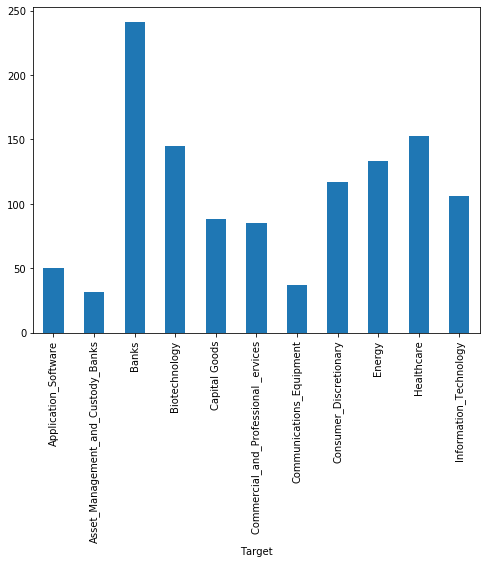

In [277]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_filtered.groupby('Target').Business_Description.count().plot.bar(ylim=0)
plt.show()

## Basic feature extraction using text data

1]Number of words

2]Number of characters

3]Average word length

4]Number of stopwords

5]Number of special characters

6]Number of numerics

7]Number of uppercase words

# 1

In [278]:
df_filtered['word_count'] = df_filtered['Business_Description'].apply(lambda x: len(str(x).split(" ")))

In [279]:
#text with word count
print('\n\nWORD COUNT\n\n')
print(df_filtered[['Business_Description','word_count']].head())



WORD COUNT


                                Business_Description  word_count
2  12 Retech Corporation, through its subsidiarie...         175
4  1847 Holdings LLC, through its subsidiaries, p...         107
5  1867 Western Financial Corporation, through it...          25
6  1mage Software Inc operates in the technology ...         227
7  1PM Industries, Inc. provides consulting servi...          33


# 2

In [280]:
# number of characters
print('\n\nNUMBER OF CHARACTERS\n\n')
df_filtered['char_count'] = df_filtered['Business_Description'].str.len() ## this also includes spaces
print(df_filtered[['Business_Description','char_count']].head())



NUMBER OF CHARACTERS


                                Business_Description  char_count
2  12 Retech Corporation, through its subsidiarie...        1183
4  1847 Holdings LLC, through its subsidiaries, p...         723
5  1867 Western Financial Corporation, through it...         186
6  1mage Software Inc operates in the technology ...        1663
7  1PM Industries, Inc. provides consulting servi...         218


## 3

In [281]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df_filtered['avg_word'] = df_filtered['Business_Description'].apply(lambda x: avg_word(x))
df_filtered[['Business_Description','avg_word']].head()

,Business_Description,avg_word
2,"12 Retech Corporation, through its subsidiarie...",5.765714
4,"1847 Holdings LLC, through its subsidiaries, p...",5.766355
5,"1867 Western Financial Corporation, through it...",6.480000
6,1mage Software Inc operates in the technology ...,6.330396
7,"1PM Industries, Inc. provides consulting servi...",5.636364


## 4

In [282]:
print('\n\nNUMBER OF STOP WORDS\n\n')
stop = stopwords.words('english')

df_filtered['stopwords'] = df_filtered['Business_Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(df_filtered[['Business_Description','stopwords']].head())



NUMBER OF STOP WORDS


                                Business_Description  stopwords
2  12 Retech Corporation, through its subsidiarie...         62
4  1847 Holdings LLC, through its subsidiaries, p...         31
5  1867 Western Financial Corporation, through it...          8
6  1mage Software Inc operates in the technology ...         67
7  1PM Industries, Inc. provides consulting servi...         11


# 5

In [283]:
print('\n\nNUMBER OF SPECIAL CHARACTERS\n\n')
df_filtered['hastags'] = df_filtered['Business_Description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
print(df_filtered[['Business_Description','hastags']].head())



NUMBER OF SPECIAL CHARACTERS


                                Business_Description  hastags
2  12 Retech Corporation, through its subsidiarie...        0
4  1847 Holdings LLC, through its subsidiaries, p...        0
5  1867 Western Financial Corporation, through it...        0
6  1mage Software Inc operates in the technology ...        0
7  1PM Industries, Inc. provides consulting servi...        0


## 6

In [284]:
print('\n\nNUMBER OF NUMERICS\n\n')
df_filtered['numerics'] = df_filtered['Business_Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(df_filtered[['Business_Description','numerics']].head())



NUMBER OF NUMERICS


                                Business_Description  numerics
2  12 Retech Corporation, through its subsidiarie...         2
4  1847 Holdings LLC, through its subsidiaries, p...         4
5  1867 Western Financial Corporation, through it...         2
6  1mage Software Inc operates in the technology ...         0
7  1PM Industries, Inc. provides consulting servi...         1


## 7

In [285]:
df_filtered['upper'] = df_filtered['Business_Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_filtered[['Business_Description','upper']].head()

,Business_Description,upper
2,"12 Retech Corporation, through its subsidiarie...",0
4,"1847 Holdings LLC, through its subsidiaries, p...",3
5,"1867 Western Financial Corporation, through it...",0
6,1mage Software Inc operates in the technology ...,12
7,"1PM Industries, Inc. provides consulting servi...",1


## Basic Text Pre-processing of text data:

### 1] Lower case

In [286]:
df_filtered['Business_Description'] = df_filtered['Business_Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_filtered['Business_Description'].head()

2    12 retech corporation, through its subsidiarie...
4    1847 holdings llc, through its subsidiaries, p...
5    1867 western financial corporation, through it...
6    1mage software inc operates in the technology ...
7    1pm industries, inc. provides consulting servi...
Name: Business_Description, dtype: object

### 2]Removing Punctuation

In [287]:
df_filtered['Business_Description'] = df_filtered['Business_Description'].str.replace('[^\w\s]','')
df_filtered['Business_Description'].head()

2    12 retech corporation through its subsidiaries...
4    1847 holdings llc through its subsidiaries pro...
5    1867 western financial corporation through its...
6    1mage software inc operates in the technology ...
7    1pm industries inc provides consulting service...
Name: Business_Description, dtype: object

### 3] Removal of Stop Words

In [288]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_filtered['Business_Description'] = df_filtered['Business_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_filtered['Business_Description'].head()

2    12 retech corporation subsidiaries operates in...
4    1847 holdings llc subsidiaries provides range ...
5    1867 western financial corporation subsidiarie...
6    1mage software inc operates technology industr...
7    1pm industries inc provides consulting service...
Name: Business_Description, dtype: object

### 4]Common word removal

In [289]:
freq = pd.Series(' '.join(df_filtered['Business_Description']).split()).value_counts()[:10]
freq

company     2661
services    2046
inc         2012
products    1317
loans       1158
provides    1146
offers       999
well         902
founded      864
also         780
dtype: int64

In [290]:
## let’s remove these words as their presence will not of any use in classification of our text data

In [291]:
freq = list(freq.index)
df_filtered['Business_Description'] = df_filtered['Business_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_filtered['Business_Description'].head()

2    12 retech corporation subsidiaries operates in...
4    1847 holdings llc subsidiaries range agricultu...
5    1867 western financial corporation subsidiarie...
6    1mage software operates technology industry ca...
7    1pm industries consulting companies various in...
Name: Business_Description, dtype: object

### 5] Rare words removal

In [292]:
freq_rare = pd.Series(' '.join(df_filtered['Business_Description']).split()).value_counts()[-10:]
freq_rare

biosimiliar     1
t3              1
feedstocks      1
ttr             1
marketmaking    1
abraxas         1
lucia           1
degreasers      1
biocentric      1
hyaloss         1
dtype: int64

In [293]:
freq_rare = list(freq_rare.index)
df_filtered['Business_Description'] = df_filtered['Business_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare))
df_filtered['Business_Description'].head()

2    12 retech corporation subsidiaries operates in...
4    1847 holdings llc subsidiaries range agricultu...
5    1867 western financial corporation subsidiarie...
6    1mage software operates technology industry ca...
7    1pm industries consulting companies various in...
Name: Business_Description, dtype: object

### 6] Spelling correction

In [294]:
#pip install textblob

In [295]:
from textblob import TextBlob
df_filtered['Business_Description'][:5].apply(lambda x: str(TextBlob(x).correct()))

2    12 reach corporation subsidiaries operate inte...
4    1847 holdings ll subsidiaries range agricultur...
5    1867 western financial corporation subsidiarie...
6    image software operate technology industry cap...
7    pm industries consulting companies various ind...
Name: Business_Description, dtype: object

### 7] Tokenization

In [296]:
TextBlob(df_filtered['Business_Description'][2]).words

WordList(['12', 'retech', 'corporation', 'subsidiaries', 'operates', 'integrated', 'retail', 'platform', 'asia', 'north', 'america', 'europe', 'platform', 'includes', '12mirror', 'instore', 'application', 'recognizes', 'clothes', 'person', 'fitting', 'takes', 'pictures', 'shared', 'friends', 'family', 'detects', 'gives', 'information', 'collects', 'data', 'consumers', 'shop', 'designer', 'manufacturer', '12kiosk', 'instore', 'application', 'browses', 'detects', 'information', 'place', 'orders', 'consumers', 'platform', '12adscreen', 'twoway', 'screen', 'voice', 'touch', 'capability', 'detects', 'people', 'front', 'screen', 'information', 'store', 'andor', 'download', 'advertised', 'pictures', 'videos', '12mobile', 'app', 'ecommerce', 'application', 'find', 'make', 'reservations', 'pay', 'purchases', 'addition', 'platform', 'staffsales', 'app', 'application', 'vendors', 'communicate', 'system', 'checking', 'product', 'information', 'inventory', 'location', '12sconti', 'app', 'helps', 'r

### 8] Stemming 

In [297]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_filtered['Business_Description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

2       12 retech corpor subsidiari oper integr retail...
4       1847 hold llc subsidiari rang agricultur const...
5       1867 western financi corpor subsidiari person ...
6       1mage softwar oper technolog industri captur i...
7       1pm industri consult compani variou industri t...
                              ...                        
1996    delek us hold engag integr downstream energi b...
1997    delhi bank corp oper bank hold delawar nation ...
1999    deliveri technolog solut research develop mark...
2000    delmar bancorp oper bank hold bank delmarva fi...
2001    delmarva bancshar oper bank hold 1880 bank var...
Name: Business_Description, Length: 1187, dtype: object

### 9] Lemmatization

In [298]:
from textblob import Word
df_filtered['Business_Description'] = df_filtered['Business_Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_filtered['Business_Description'].head()

2    12 retech corporation subsidiary operates inte...
4    1847 holding llc subsidiary range agriculture ...
5    1867 western financial corporation subsidiary ...
6    1mage software operates technology industry ca...
7    1pm industry consulting company various indust...
Name: Business_Description, dtype: object

### define X and Y

In [299]:
X = df_filtered.Business_Description
Y = df_filtered.Target

In [300]:
X

2       12 retech corporation subsidiary operates inte...
4       1847 holding llc subsidiary range agriculture ...
5       1867 western financial corporation subsidiary ...
6       1mage software operates technology industry ca...
7       1pm industry consulting company various indust...
                              ...                        
1996    delek u holding engages integrated downstream ...
1997    delhi bank corp operates bank holding delaware...
1999    delivery technology solution research developm...
2000    delmar bancorp operates bank holding bank delm...
2001    delmarva bancshares operates bank holding 1880...
Name: Business_Description, Length: 1187, dtype: object

In [301]:
Y

2                     Information_Technology
4       Commercial_and_Professional _ervices
5                                      Banks
6                       Application_Software
7       Commercial_and_Professional _ervices
                        ...                 
1996                                  Energy
1997                                   Banks
1999    Commercial_and_Professional _ervices
2000                                   Banks
2001                                   Banks
Name: Target, Length: 1187, dtype: object

In [302]:
print(X.shape)
print(Y.shape)

(1187,)
(1187,)


In [303]:
X = X.reset_index(drop=True)

In [304]:
Y = Y.reset_index(drop=True)

In [305]:
X

0       12 retech corporation subsidiary operates inte...
1       1847 holding llc subsidiary range agriculture ...
2       1867 western financial corporation subsidiary ...
3       1mage software operates technology industry ca...
4       1pm industry consulting company various indust...
                              ...                        
1182    delek u holding engages integrated downstream ...
1183    delhi bank corp operates bank holding delaware...
1184    delivery technology solution research developm...
1185    delmar bancorp operates bank holding bank delm...
1186    delmarva bancshares operates bank holding 1880...
Name: Business_Description, Length: 1187, dtype: object

In [306]:
Y

0                     Information_Technology
1       Commercial_and_Professional _ervices
2                                      Banks
3                       Application_Software
4       Commercial_and_Professional _ervices
                        ...                 
1182                                  Energy
1183                                   Banks
1184    Commercial_and_Professional _ervices
1185                                   Banks
1186                                   Banks
Name: Target, Length: 1187, dtype: object

###  Advance Text Processing

-->Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques

## TF IDF

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, encoding='latin-1', min_df=1,max_df=1.0 ,stop_words='english')
features = tfidf.fit_transform(X).toarray()
labels = Y
features.shape

(1187, 12826)

In [308]:
print(features.shape)
print(labels.shape)

(1187, 12826)
(1187,)


### Spliting train and test

In [309]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(features,
                                              labels,
                                              test_size=.3,
                                              random_state=42)

In [310]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(830, 12826)
(830,)
(357, 12826)
(357,)


In [311]:
print(train_x.dtype)
print(train_y.dtype)
print(test_x.dtype)
print(test_y.dtype)

float64
object
float64
object


## Use the ML Algorithms to Predict the outcome

### Naive Bayes

In [312]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [313]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [314]:
np.unique(train_x)

array([0.        , 0.01838851, 0.01860543, ..., 0.66614691, 0.66740507,
       0.73009413])

In [315]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(train_x,train_y)

Wall time: 1.8 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [316]:
# make class predictions for test and train
y_pred_test = nb.predict(test_x)
y_pred_train = nb.predict(train_x)

In [317]:
# print the confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
metrics.confusion_matrix(test_y, y_pred_test)

array([[ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  9],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 73,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 16,  0,  8,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 24,  2,  0,  0,  0,  0,  1,  4,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0, 10],
       [ 0,  0, 25,  0,  0,  0,  0,  6,  0,  1,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  0,  3, 10,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  1, 15]], dtype=int64)

In [318]:
# print the confusion matrix
metrics.confusion_matrix(train_y, y_pred_train)

array([[  0,   0,  15,   0,   0,   0,   0,   1,   2,   1,  16],
       [  0,   0,  20,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0, 168,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 101,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,  23,   0,  37,   0,   0,   0,   1,   1,   0],
       [  0,   0,  35,   0,   2,  10,   0,   0,   5,   2,   0],
       [  0,   0,  10,   0,   0,   0,   0,   0,   0,   0,  14],
       [  0,   0,  18,   0,   0,   0,   0,  64,   0,   1,   1],
       [  0,   0,   3,   0,   0,   0,   0,   0,  86,   0,   0],
       [  0,   0,   4,  10,   0,   0,   0,   0,   0,  96,   0],
       [  0,   0,  11,   0,   0,   0,   0,   0,   0,   0,  68]],
      dtype=int64)

In [319]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(train_y, y_pred_train)

0.7590361445783133

In [320]:
metrics.accuracy_score(test_y, y_pred_test)

0.6050420168067226

### Apply Logistic regression

In [321]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Accuracy Evaluation

In [322]:
y_pred=logreg.predict(test_x)

In [323]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[ 0,  0,  0,  0,  1,  0,  0,  2,  0,  0, 12],
       [ 0,  3,  2,  0,  0,  0,  0,  2,  0,  2,  1],
       [ 0,  0, 72,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 14,  2,  0,  6,  1,  2,  1],
       [ 0,  0,  1,  2,  1, 10,  0,  5,  1,  7,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  2,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  7,  0,  0, 19]], dtype=int64)

In [324]:
#Evelution of train and test accuracy
from sklearn import metrics
train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)



train_accuracy:  0.9313253012048193
test_accuracy:  0.7282913165266106


### XGBOOST

In [325]:
from xgboost import XGBClassifier

In [326]:
XGBClassifier?

In [327]:
#All Columns
xgb_estimator = XGBClassifier(random_state = 42,n_jobs=-1,verbose=1)
xgb_estimator.fit(test_x,test_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

In [328]:
xgb_predict =xgb_estimator.predict(test_x)

In [329]:
# creating a confusion matrix 
cm = confusion_matrix(test_y, xgb_predict) 
cm

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 73,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27]], dtype=int64)

In [330]:
print(metrics.classification_report(test_y, xgb_predict))

                                      precision    recall  f1-score   support

                Application_Software       1.00      1.00      1.00        15
  Asset_Management_and_Custody_Banks       1.00      1.00      1.00        10
                               Banks       1.00      1.00      1.00        73
                       Biotechnology       1.00      1.00      1.00        42
                       Capital Goods       1.00      1.00      1.00        26
Commercial_and_Professional _ervices       1.00      1.00      1.00        31
            Communications_Equipment       1.00      1.00      1.00        13
              Consumer_Discretionary       1.00      1.00      1.00        33
                              Energy       1.00      1.00      1.00        44
                          Healthcare       1.00      1.00      1.00        43
              Information_Technology       1.00      1.00      1.00        27

                            accuracy                          

In [331]:
test_accuracy=metrics.accuracy_score(test_y, xgb_predict)
print('test_accuracy: ',test_accuracy)


test_accuracy:  1.0


### svm

In [332]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto').fit(train_x,train_y)
SVM.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [333]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_x)

In [334]:
# creating a confusion matrix 
cm = confusion_matrix(test_y, predictions_SVM) 
cm

array([[ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0, 12],
       [ 0,  4,  1,  0,  0,  1,  0,  4,  0,  0,  0],
       [ 0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 17,  3,  0,  4,  0,  1,  1],
       [ 0,  0,  0,  0,  1, 16,  0,  8,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0, 36,  2],
       [ 1,  0,  0,  0,  1,  0,  0,  6,  0,  0, 19]], dtype=int64)

In [335]:
print(metrics.classification_report(test_y, predictions_SVM))

                                      precision    recall  f1-score   support

                Application_Software       0.50      0.07      0.12        15
  Asset_Management_and_Custody_Banks       1.00      0.40      0.57        10
                               Banks       0.99      0.96      0.97        73
                       Biotechnology       0.88      0.86      0.87        42
                       Capital Goods       0.85      0.65      0.74        26
Commercial_and_Professional _ervices       0.80      0.52      0.63        31
            Communications_Equipment       1.00      0.38      0.56        13
              Consumer_Discretionary       0.52      0.79      0.63        33
                              Energy       1.00      1.00      1.00        44
                          Healthcare       0.80      0.84      0.82        43
              Information_Technology       0.35      0.70      0.46        27

                            accuracy                          

In [336]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score test -> ",accuracy_score(test_y,predictions_SVM))

SVM Accuracy Score test ->  0.7675070028011205


### builded model using training data

In [337]:
# prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

joblib.dump(SVM, 'model.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model.pkl']

## classify the Companies in ‘Company Business description file.

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [339]:
US1 = pd.read_excel('Company_ Business Description.xlsx')

In [340]:
US1.head()

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Security Tickers
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",OTCPK:EEIG
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...",NasdaqGS:FLWS; DB:FWC
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",OTCPK:RETC
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",NasdaqGM:PIH
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",OTCPK:EFSH


In [341]:
US1.columns

Index(['Company Name', 'Exchange:Ticker', 'Company Type', 'Company Status',
       'Geographic Locations', 'Business Description', 'Security Tickers'],
      dtype='object')

In [342]:
US1.shape

(8425, 7)

In [343]:
US1.dtypes

Company Name            object
Exchange:Ticker         object
Company Type            object
Company Status          object
Geographic Locations    object
Business Description    object
Security Tickers        object
dtype: object

In [344]:
#checking duplicate values 
US1.duplicated().value_counts()# no duplicateds

False    8425
dtype: int64

In [345]:
#Checking for missing values
US1.isnull().any().value_counts()

False    7
dtype: int64

## Basic Text Pre-processing of text data:

### 1] Lower case

In [346]:
US1['Business Description'] = US1['Business Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
US1['Business Description'].head()

0    024 pharma, inc. provides healthcare products ...
1    1-800-flowers.com, inc., together with its sub...
2    12 retech corporation, through its subsidiarie...
3    1347 property insurance holdings, inc., throug...
4    1847 holdings llc, through its subsidiaries, p...
Name: Business Description, dtype: object

### 2]Removing Punctuation

In [347]:
US1['Business Description'] = US1['Business Description'].str.replace('[^\w\s]','')
US1['Business Description'].head()

0    024 pharma inc provides healthcare products wo...
1    1800flowerscom inc together with its subsidiar...
2    12 retech corporation through its subsidiaries...
3    1347 property insurance holdings inc through i...
4    1847 holdings llc through its subsidiaries pro...
Name: Business Description, dtype: object

### 3] Removal of Stop Words

In [348]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
US1['Business Description'] = US1['Business Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
US1['Business Description'].head()

0    024 pharma inc provides healthcare products wo...
1    1800flowerscom inc together subsidiaries provi...
2    12 retech corporation subsidiaries operates in...
3    1347 property insurance holdings inc subsidiar...
4    1847 holdings llc subsidiaries provides range ...
Name: Business Description, dtype: object

### 4]Common word removal

In [349]:
freq = pd.Series(' '.join(US1['Business Description']).split()).value_counts()[:10]
freq

company     18089
inc         14193
services    12980
products    11060
provides     7543
offers       6769
founded      6041
well         5662
also         5094
operates     4900
dtype: int64

In [350]:
## let’s remove these words as their presence will not of any use in classification of our text data

In [351]:
freq = list(freq.index)
US1['Business Description'] = US1['Business Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
US1['Business Description'].head()

0    024 pharma healthcare worldwide include vitami...
1    1800flowerscom together subsidiaries gourmet f...
2    12 retech corporation subsidiaries integrated ...
3    1347 property insurance holdings subsidiaries ...
4    1847 holdings llc subsidiaries range agricultu...
Name: Business Description, dtype: object

### 5] Rare words removal

In [352]:
freq_rare = pd.Series(' '.join(US1['Business Description']).split()).value_counts()[-10:]
freq_rare

medimat               1
highlyconcentrated    1
272                   1
trellis               1
roane                 1
contentsentral        1
paperweights          1
meeker                1
nonopiate             1
cloudenabled          1
dtype: int64

In [353]:
freq_rare = list(freq_rare.index)
US1['Business Description'] = US1['Business Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare))
US1['Business Description'].head()

0    024 pharma healthcare worldwide include vitami...
1    1800flowerscom together subsidiaries gourmet f...
2    12 retech corporation subsidiaries integrated ...
3    1347 property insurance holdings subsidiaries ...
4    1847 holdings llc subsidiaries range agricultu...
Name: Business Description, dtype: object

### 6] Spelling correction

In [354]:
#pip install textblob

In [355]:
from textblob import TextBlob
US1['Business Description'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    024 parma healthcare worldwide include vitamin...
1    1800flowerscom together subsidiaries gourmet f...
2    12 reach corporation subsidiaries integrated r...
3    1347 property insurance holdings subsidiaries ...
4    1847 holdings ll subsidiaries range agricultur...
Name: Business Description, dtype: object

### 7] Tokenization

In [356]:
TextBlob(US1['Business Description'][2]).words

WordList(['12', 'retech', 'corporation', 'subsidiaries', 'integrated', 'retail', 'platform', 'asia', 'north', 'america', 'europe', 'platform', 'includes', '12mirror', 'instore', 'application', 'recognizes', 'clothes', 'person', 'fitting', 'takes', 'pictures', 'shared', 'friends', 'family', 'detects', 'gives', 'information', 'collects', 'data', 'consumers', 'shop', 'designer', 'manufacturer', '12kiosk', 'instore', 'application', 'browses', 'detects', 'information', 'place', 'orders', 'consumers', 'platform', '12adscreen', 'twoway', 'screen', 'voice', 'touch', 'capability', 'detects', 'people', 'front', 'screen', 'information', 'store', 'andor', 'download', 'advertised', 'pictures', 'videos', '12mobile', 'app', 'ecommerce', 'application', 'find', 'make', 'reservations', 'pay', 'purchases', 'addition', 'platform', 'staffsales', 'app', 'application', 'vendors', 'communicate', 'system', 'checking', 'product', 'information', 'inventory', 'location', '12sconti', 'app', 'helps', 'reducing', 'f

### 8] Stemming 

In [357]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
US1['Business Description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       024 pharma healthcar worldwid includ vitamin m...
1       1800flowerscom togeth subsidiari gourmet food ...
2       12 retech corpor subsidiari integr retail plat...
3       1347 properti insur hold subsidiari properti c...
4       1847 hold llc subsidiari rang agricultur const...
                              ...                        
8420    yappn corp languag translat realtim languag tr...
8421    yasheng group subsidiari design develop manufa...
8422    zenergi brand energi technolog engag sale ener...
8423    zulutek internet advertis zulutek formerli kno...
8424    zurvita hold market health well unit state hon...
Name: Business Description, Length: 8425, dtype: object

### 9] Lemmatization

In [358]:
from textblob import Word
US1['Business Description'] = US1['Business Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
US1['Business Description'].head()

0    024 pharma healthcare worldwide include vitami...
1    1800flowerscom together subsidiary gourmet foo...
2    12 retech corporation subsidiary integrated re...
3    1347 property insurance holding subsidiary pro...
4    1847 holding llc subsidiary range agriculture ...
Name: Business Description, dtype: object

## TF_IDF

In [359]:
X = US1['Business Description']

In [360]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature = tfidf.transform(X)
feature.shape

(8425, 12826)

In [361]:
print(feature.shape)

(8425, 12826)


In [362]:
feature.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [363]:
x = feature.todense()

In [364]:
y = SVM.predict(x)

In [365]:
y

array(['Healthcare', 'Consumer_Discretionary', 'Information_Technology',
       ..., 'Capital Goods', 'Consumer_Discretionary', 'Healthcare'],
      dtype=object)

In [366]:
US1['Predict']=pd.Series(y)

In [367]:
US1.head()

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Security Tickers,Predict
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),024 pharma healthcare worldwide include vitami...,OTCPK:EEIG,Healthcare
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),1800flowerscom together subsidiary gourmet foo...,NasdaqGS:FLWS; DB:FWC,Consumer_Discretionary
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),12 retech corporation subsidiary integrated re...,OTCPK:RETC,Information_Technology
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),1347 property insurance holding subsidiary pro...,NasdaqGM:PIH,Consumer_Discretionary
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),1847 holding llc subsidiary range agriculture ...,OTCPK:EFSH,Commercial_and_Professional _ervices


In [368]:
US1.to_excel('predict.xlsx')